In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
plt.style.use('ggplot')
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
import pandas as pd
from sklearn.mixture import GaussianMixture
import os
from scipy.stats import norm, multivariate_normal

In [8]:
n_points = 2500
X1 = np.ones(n_points)
X2 = np.ones(n_points)
mus = [0, 2]
rho = .75

for it in range(n_points - 1):
    X1[it + 1] = norm.rvs(loc=mus[0] + rho*(X2[it] - mus[1]), scale=np.sqrt(1-rho**2))
    X2[it + 1] = norm.rvs(loc=mus[1] + rho*(X1[it + 1] - mus[0]), scale=np.sqrt(1-rho**2))

X1 = X1[500:]
X1 = X1[::2]
X2 = X2[500:]
X2 = X2[::2]

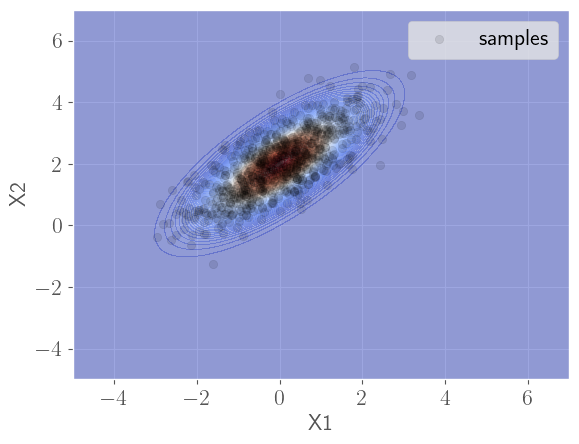

In [11]:
x = np.linspace(-5, 7, 100)
xx, yy = np.meshgrid(x, x)
X = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)
cov=np.array([[1, rho],[rho, 1]])
density = multivariate_normal(mus, cov=cov).pdf(X)
plt.contourf(x, x, density.reshape(100, 100), levels=100, cmap='coolwarm', alpha=.5)
plt.scatter(X1, X2, color='black', alpha=.1, label='samples')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.savefig('bivar.png', dpi=300, bbox_inches='tight')

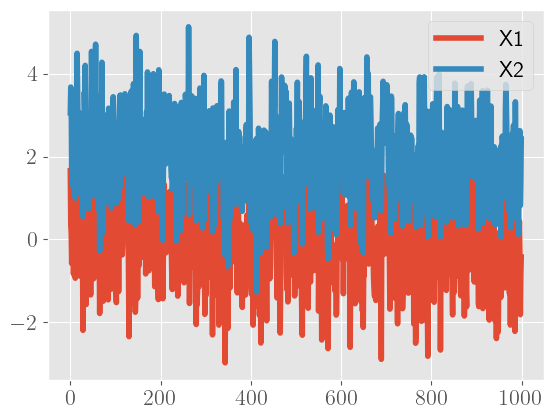

In [10]:
plt.plot(X1, label='X1')
plt.plot(X2, label='X2')
plt.legend()
plt.xlabel('ite')
plt.savefig('traces.png', dpi=300, bbox_inches='tight')


In [5]:
from statsmodels.graphics.tsaplots import plot_acf

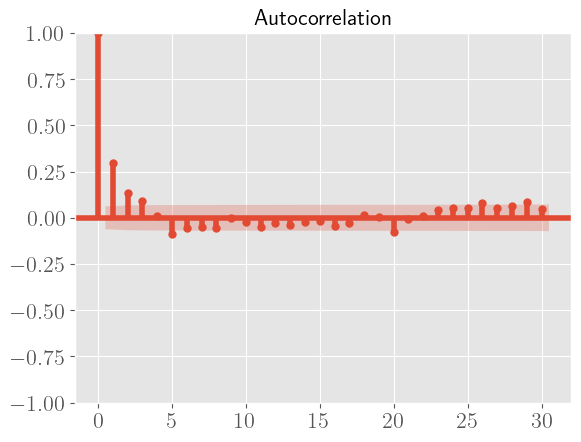

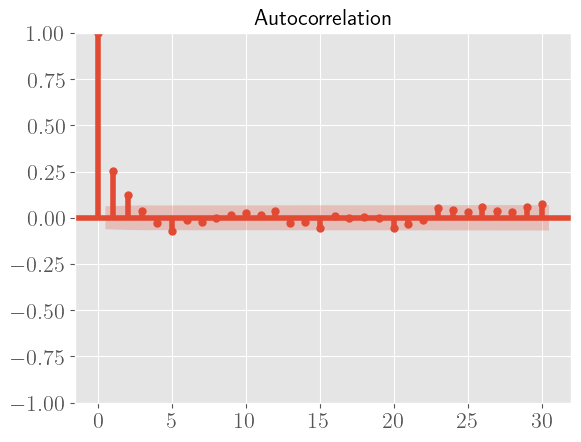

In [6]:
plot_acf(X1)
plot_acf(X2);